
# Project: Investigate IMDb movies dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this data analysis report i will use TMDb movies data set, This data set contains information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions:
1- What are the movies with the highest profit and highest revenue?  
2- What are the movies with the lowest profit (highest loss) and lowest revenue?    
3- What are the movies with highest and lowest budgets?    
4- What is the average movie runtime?     
5- What is the average movie budget?  
6- What are the 3 most frequent genres?  
7- What is the average runtime of movies with profits above median?   
8- Is better ratings related to higher voter count?  
9- What are the average profit, runtime, budget of successful movies(PROFIT>BUDGET)?
10- what is the most frequent cast?

In [3]:
# First we import libraries that we will use to manipulate/analyse/represent out data with. 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### We start by loading the data set and taking a sample of 3 rows to explore how our data looks like and indicate problems and data that is extra and has no benefit.

### General Properties

In [4]:
#Here we load our csv file which contains data into pandas dataframe and display a sample.
df = pd.read_csv("tmdb-movies.csv")

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#We check for number of columns and rows.
print("Number of rows: "+str(df.shape[0]))

print("Number of columns: "+str(df.shape[1]))

Number of rows: 10866
Number of columns: 21


In [6]:
#Here we also check our dataframe for more usefull information about the data contained.
#We did this to see each column datatype, count, null/non-null status.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Last but not least we can have some summary statistics from columns that contain numerical data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


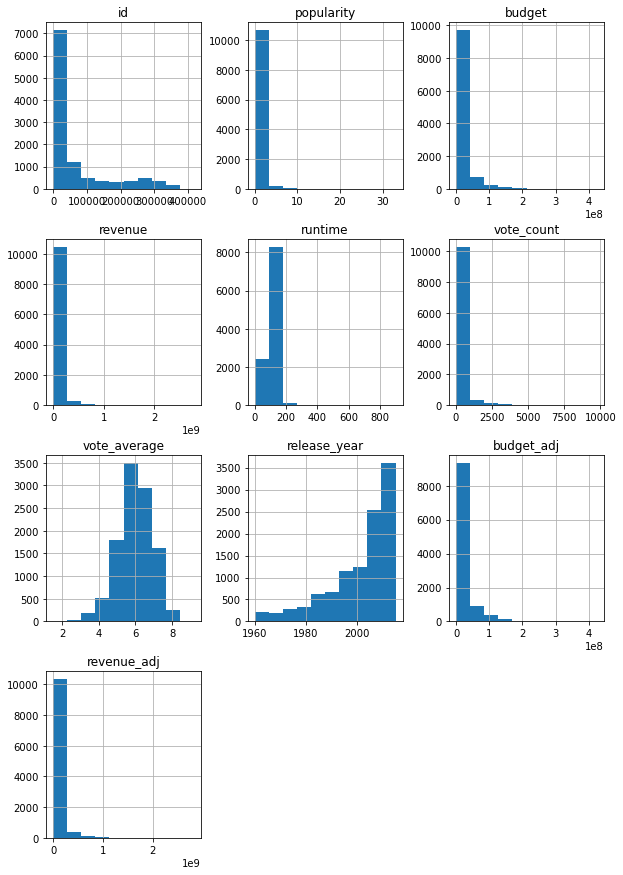

In [8]:
df.hist(figsize=(10,15));

### Conclusions and notes on the csv file (data set) 

1- Some columns (cast, director, keywords, genres, production_companies) have multiple values in each row separated by '|' .  
2- release_date column has string data type which needs to be converted to datetime  
3- budget, revenue have bad representation which needs datatype correction  
4- Some columns will not be used in our statistic and has no benefit so they must be removed.  
5- A new column could be added to get the result of difference between revenue and budget such as to calculate profits!



### Data Cleaning (prepairing our dataset to start our analysis)

#### First step: converting release_date column from string to datetime format.

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])

#### Seconed step: remove duplicate records.

In [10]:
#Here we check for sum of number of duplicated records then we remove them and recheck for their removal.
duplicates = sum(df.duplicated())
print("There are "+str(duplicates)+" duplicate records in this dataset!")

df.drop_duplicates(inplace=True)
print("Number of rows after deleting duplicates : "+str(df.shape[0]))

There are 1 duplicate records in this dataset!
Number of rows after deleting duplicates : 10865


#### Third step: removing null values.

In [11]:
#Here i made a list of all columns that might contain 0 values and might bias our analysis.
cols = ['budget','revenue','runtime','budget_adj','revenue_adj']

#First we replace it with NaN to use dropna() function.
df[cols] = df[cols].replace(0,np.NAN)

#now we drop rows with NaN values
df.dropna(subset=cols,inplace=True)

#check if the rows are removed.
print("Number of rows after deleting rows with NaN values : "+str(df.shape[0]))

Number of rows after deleting rows with NaN values : 3854


#### Fourth step: removing unimportant columns.

In [12]:
#first we make a list of column names to be dropped
unused_columns = ['id', 'imdb_id','homepage', 'keywords', 'overview']

#Then we drop them
df = df.drop(unused_columns,axis=1)

#### Fifth step: we correct some datatypes.

In [13]:
#we correct revenue, budget, revenue_adj, budget_adj datatypes.
df['revenue'] = df['revenue'].astype('int64')
df['revenue_adj'] = df['revenue_adj'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['budget_adj'] = df['budget_adj'].astype('int64')

#### Sixth step: finally we create profit column.

In [14]:
#We use insert function for making profit columns appear in the first index!
df.insert(0,'profit',df['revenue']-df['budget'])
df['profit'] = df['profit'].astype('int64')

In [15]:
#Displaying info after this multiple manipulations as a check!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   profit                3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   int64         
 3   revenue               3854 non-null   int64         
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   tagline               3574 non-null   object        
 8   runtime               3854 non-null   float64       
 9   genres                3854 non-null   object        
 10  production_companies  3808 non-null   object        
 11  release_date          3854 non-null   datetime64[ns]
 12  vote_count            3854 non-null   int64         
 13  vote_average     

In [16]:
df.head()

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025
3,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4,1316249360,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Highest profit and revenue movies!

In [17]:
#First we get maximum value from columns of interest.
max_revenue = df['revenue'].max()
max_profit = df['profit'].max()

#Then we filter and take them as series to get their full info.
max_rev_movie = df[df['revenue'] == max_revenue]
max_prof_movie = df[df['profit'] == max_profit]

print("The Movie with the title {} has the maximum profit which is {} $".format(max_prof_movie['original_title'].to_string().split()[1],max_profit))
print("The Movie with the title {} has the maximum revenue which is {} $".format(max_rev_movie['original_title'].to_string().split()[1],max_revenue))


The Movie with the title Avatar has the maximum profit which is 2544505847 $
The Movie with the title Avatar has the maximum revenue which is 2781505847 $


#### Below is more data about these movies.

In [18]:
max_prof_movie

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,2544505847,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902,2827123750


### Research Question 2: Lowest profit (Highest loss) and revenue moveis!

In [19]:
#First we get minimum value from columns of interest.
min_revenue = df['revenue'].min()
min_profit = df['profit'].min()

#Then we filter and take them as series to get their full info.
min_rev_movie = df[df['revenue'] == min_revenue]
min_prof_movie = df[df['profit'] == min_profit]

print("The Movie with the title {} has the highest loss 'lowest profit' which is {} $".format(' '.join(min_prof_movie['original_title'].to_string().split()[1:]),min_profit))
print("The Movie with the title {} has the lowest revenue which is {} $".format(' '.join(min_rev_movie['original_title'].to_string().split()[1:3]),min_revenue))


The Movie with the title The Warrior's Way has the highest loss 'lowest profit' which is -413912431 $
The Movie with the title Shattered Glass has the lowest revenue which is 2 $


#### Below is more data about these movies.

In [20]:
min_rev_movie

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,-5999998,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,NaN,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7112115,2
8142,-5999998,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,They're not there to shop. They're not there t...,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8585801,2


In [21]:
min_prof_movie

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,-413912431,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569


### Research Question 3: highest and lowest Budget movies

In [22]:
max_budget = df['budget'].max()
min_budget = df['budget'].min()

max_budget_df = df[df['budget'] == max_budget]
min_budget_df = df[df['budget'] == min_budget]

print("The Movie with the title {} has the highest budget which is {} $".format(' '.join(max_budget_df['original_title'].to_string().split()[1:4]),max_budget))
print("The Movie with the title {} has the lowest budget which is {} $".format(' '.join(min_budget_df['original_title'].to_string().split()[1:4]),min_budget))

The Movie with the title The Warrior's Way has the highest budget which is 425000000 $
The Movie with the title Lost & Found has the lowest budget which is 1 $


#### Below is more data about these movies.

In [23]:
max_budget_df

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,-413912431,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569


In [24]:
min_budget_df

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,99,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95.0,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1,130
3581,1377,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0,1335


### Research Question 4: Average movies runtime

In [25]:
#We use numpy for fast computation of mean.
runtime_mean = np.mean(df['runtime'])
print("The average movies runtime is: "+str(runtime_mean)+" minutes.")

The average movies runtime is: 109.22029060716139 minutes.


Average runtime of movies is 109 minutes and we can represent this in a better way using a histogram like below

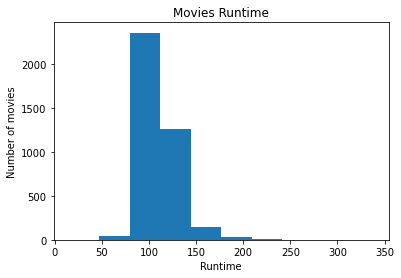

In [26]:
plt.hist(df['runtime'])
plt.title("Movies Runtime")
plt.xlabel("Runtime")
plt.ylabel("Number of movies")
plt.show()

So now we can visualize what we observed earlier from the analysis

In [27]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

##### Also we can see that 50% of movies are less than 109 minutes long and the maximum film duration is 338 minutes, WHAT A LONG MOVIE!!

### Research Question 5: Average movies budgets

In [28]:
#We use numpy for fast computation of mean.
budget_mean = np.mean(df['budget'])
print("The average movies budget is: "+str(budget_mean)+" $.")

The average movies budget is: 37203696.954852104 $.


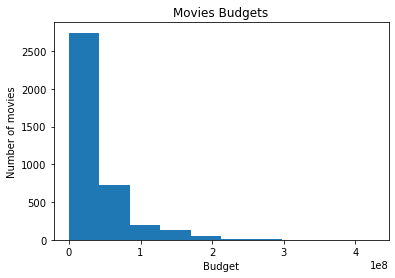

In [29]:
plt.hist(df['budget'])
plt.title("Movies Budgets")
plt.xlabel("Budget")
plt.ylabel("Number of movies")
plt.show()

So the average budget is 37 Million Dollars, That's alot of money for sure!

### Research Question 6: Most frequent genres

In [30]:
# So since we have multiple columns that have '|' as a separator  we can make a function that separates data
# and give us a pandas Series object containing them.

def separated_cols(col):
    #First we separate by '|' as its in between values.
    col_sep = df[col].str.cat(sep='|')
    #initialize a pandas series with the values.
    col_sep = pd.Series(col_sep.split('|'))
    
    return col_sep

In [31]:

freq_genres = separated_cols('genres')

#Then we arrange our series.
most_freq = freq_genres.value_counts(ascending=False)

most_freq.head(3)

Drama       1756
Comedy      1358
Thriller    1204
dtype: int64

#### So the most 3 frequent genres are Drama, Comedy and Thriller.  
#### We can do a small representation to show this below: 

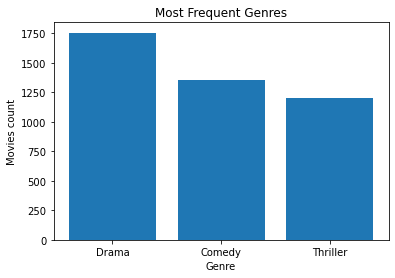

In [32]:
# Create a bar chart with proper labels
locations = [1, 2, 3]
heights = [most_freq.iloc[0],most_freq.iloc[1],most_freq.iloc[2]]
labels = ['Drama','Comedy','Thriller']
plt.bar(locations, heights, tick_label=labels)
plt.title('Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Movies count');
plt.show()

### Research Question 7: Average runtime of movies with profit above median

In [33]:
#We get median of profit
profit_median = df['profit'].median()
profit_median

20020190.0

In [34]:
#We use query() to get a dataframe of movies with profit above median
profit_runtime = df.query('profit > 20020190.0')
profit_runtime.head(2)

,profit,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [35]:
#We get average runtime of this movies!
profit_runtime['runtime'].mean()

112.28126621691749

#### So mean runtime of movies with profits above median is 112 Minutes!

### Research Question 8: Is better rating related to higher voter count?

In [36]:
#We get 2 columns 'vote_count' and 'vote_average' to do our analysis.
vote_rate = df.loc[:, 'vote_count' : 'vote_average']

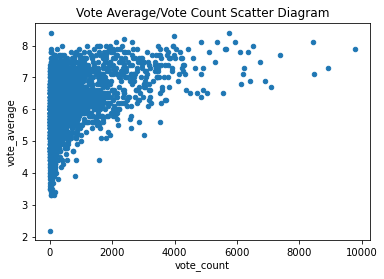

In [48]:
vote_rate.plot(x='vote_count', y='vote_average', kind='scatter',title="Vote Average/Vote Count Scatter Diagram");

In [38]:
vote_rate.corr()

,vote_count,vote_average
vote_count,1.00000,0.38721
vote_average,0.38721,1.00000


#### Well, this co-relation coeffient show no indication of movies having better rating to higher vote count

### Research Question 9: Average budget and runtime of successful movies(Has profits > budget)

In [39]:
#we get our condition first
smovies = df['profit'] > df['budget']

#create a dataframe with it.
pr_cd = df[smovies]

#Get average profit and budget of successful
print("Successful movies has an average profit of: " + str(pr_cd.profit.mean())+"$")
print("Successful movies has an average budget of: " + str(pr_cd.budget.mean())+"$")
print("Successful movies has an average runtime of: " + str(pr_cd.runtime.mean())+"$")



Successful movies has an average profit of: 133988186.28550223$
Successful movies has an average budget of: 39031191.35972291$
Successful movies has an average runtime of: 110.13013359722909$


#### Here we got successful movies which have profits > budget and got thier average profit, budget and runtime.
#### Now we shot some relations graphically below:

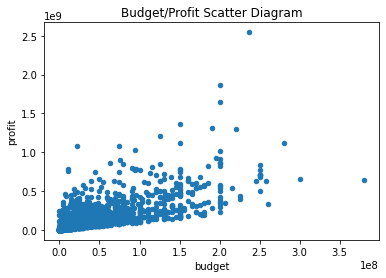

In [44]:
pr_cd.plot(x='budget',y='profit',kind='scatter',title="Budget/Profit Scatter Diagram");

co-relation between budget and profit.

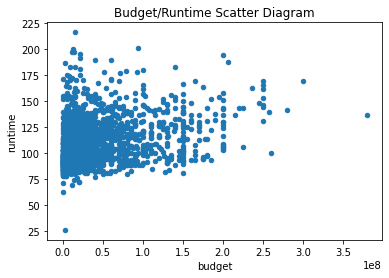

In [45]:
pr_cd.plot(x='budget',y='runtime',kind='scatter',title="Budget/Runtime Scatter Diagram");

co-relation between budget and runtime.

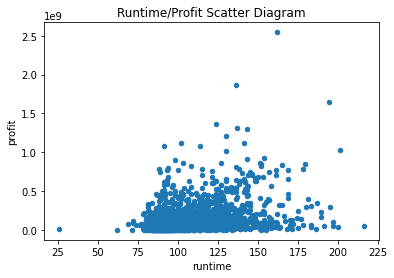

In [47]:
pr_cd.plot(x='runtime',y='profit',kind='scatter',title="Runtime/Profit Scatter Diagram");


co-relation between runtime and profit.

In [55]:
budget_runtime_rate = df.loc[:, ['budget' , 'runtime']]
budget_runtime_rate.corr()

,budget,runtime
budget,1.000000,0.260977
runtime,0.260977,1.000000


#### Very weak co-relation between budget and runtime!
#### Overall : 
#### Successful movies has an average profit of: 133,988,186.28550223 dollars
#### Successful movies has an average budget of: 39,031,191.35972291 dollars
#### Successful movies has an average runtime of: 110.13013359722909 minutes

### Research Question 10: Most frequent cast

In [62]:
# So here we use a function that we defined earlier to get data from columns that has '|' separators.
freq_cast = separated_cols('cast')
most_freq_casts = freq_cast.value_counts(ascending=False)

most_freq_casts.head(3)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
dtype: int64

#### So the most frequent casts are Robert De Niro, Bruce Willis, Samuel L. Jackson.

<a id='conclusions'></a>
## Conclusions

1- The Movie with the title Avatar has the maximum profit which is 2,544,505,847 dollars
The Movie with the title Avatar has the maximum revenue which is 2,781,505,847 dollars.    
2- The Movie with the title The Warrior's Way has the highest loss which is -413912431 dollars (The film didn't make any profit),
The Movie with the title Shattered Glass has the lowest revenue which is 2 dollars.  
3- The Movie with the title The Warrior's Way has the highest budget which is 425,000,000 dollars while the Movie with the title Lost & Found has the lowest budget which is 1 dollar.  
4- Average runtime of movies is 109 minutes.  
5- Average moveis budget is 37 Million Dollars (Assumed dollars as an internationl currency).   
6- Most 3 Frequent genres are Drama, Comedy, Thriller.  
7- Average runtime of movies with profits above median is 112 minutes.  
8- this co-relation coeffient show no indication of movies having better rating to higher vote count.  
9- Successful movies has an average profit of: 133,988,186.28550223 dollars
Successful movies has an average budget of: 39,031,191.35972291 dollars
Successful movies has an average runtime of: 110.13013359722909 minutes.  
10- Most frequent casts are Robert De Niro, Bruce Willis, Samuel L. Jackson.
#### So the main conclusion is:
To have a successful movie budget should be around 39Million dollars, It should be one of the three top genres (Drama, Comedy, Thriller), it also should have and average runtime of 110 minutes, A successful movie would have an average profit of 133+ Million dollars in profits.  

### Limitations
This analysis is done using imdb movies sample and considered successful movies only by profit which might not be 100% or error free, Also we were not provided with a currency unit so we assumed it to be in US Dollar and the dataset might be outdated or has incomplete critical data like rows with missing values which might bias our analysis and make it wrong.